<a href="https://colab.research.google.com/github/Rotha-Vichet/ML-finalProject/blob/main/HeartDiseasePredictionDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#lib
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Rotha-Vichet/ML-finalProject/main/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
x_variable = ['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach', 'exang','oldpeak', 'slope', 'ca', 'thal']
y_variable = ['target']
len(x_variable)
#reshape variable
x = df[x_variable].values.reshape(-1,13)#1st value is -1,next value is the length of x_variable
y = df[y_variable].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(303, 13)
(303, 1)


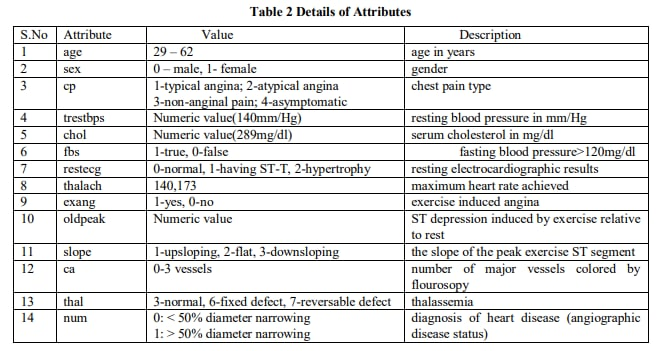

In [7]:
#Cate to numerriacal
# le_sex = preprocessing.LabelEncoder()
# le_sex.fit(['0', '1'])
# x[:,1] = le_sex.transform(x[:,1]) 

# le_cp = preprocessing.LabelEncoder()
# le_cp.fit(['1', '2', '3', '4'])
# x[:,2] = le_cp.transform(x[:,2]) 

# le_fbs = preprocessing.LabelEncoder()
# le_fbs.fit(['1', '0'])
# x[:,5] = le_fbs.transform(x[:,5]) 

# le_restecg= preprocessing.LabelEncoder()
# le_restecg.fit(['0', '1', '2'])
# x[:,7] = le_restecg.transform(x[:,7]) 

# le_exang= preprocessing.LabelEncoder()
# le_exang.fit(['0', '1'])
# x[:,9] = le_exang.transform(x[:,9])

# le_slope= preprocessing.LabelEncoder()
# le_slope.fit(['1', '2', '3'])
# x[:,11] = le_slope.transform(x[:,11])

# le_ca= preprocessing.LabelEncoder()
# le_ca.fit(['0','1', '2', '3'])
# x[:,12] = le_ca.transform(x[:,12])

# le_thal= preprocessing.LabelEncoder()
# le_thal.fit(['0','1', '2', '3'])
# x[:,13] = le_thal.transform(x[:,13])

In [8]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [9]:
#  split the data set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)

(242, 13)
(61, 13)


In [8]:
# build model
# from sklearn.tree import DecisionTreeClassifier
# import sklearn.tree as tree
# foot_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = None, splitter='best').fit(x_train,y_train)
# print(foot_Tree.tree_.max_depth)

In [9]:
from base64 import decode
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
foot_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
foot_Tree # it shows the default parameters 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [10]:
# prediction
y_predict = foot_Tree.fit(x_test, y_test) 

In [11]:
predict = foot_Tree.predict(x_test)
print(predict[0:8])
print(y_test[0:8])

[0 0 0 0 0 0 0 1]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [12]:
# print(predict[0:8])
# print(y_test[0:8])

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, predict))

Decision Tree's Accuracy: 0.9016393442622951


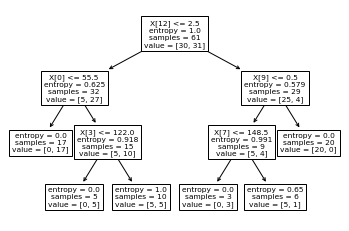

In [14]:
tree.plot_tree(foot_Tree)
plt.show()